## Name : Omkar Khanvilkar
## Assignment 6
## Download iris dataset and usual libraries

In [22]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn
import seaborn as sns

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [23]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [24]:
df = pd.DataFrame(iris_data['data'], columns=['SepalLength','SepalWidth','PetalLength','PetalWidth'])

## [Added step A] - Use GMM to separate the clusters using all 4 features: petal length & width, and sepal length & width. Map each cluster to a class by picking the most common class for each cluster (using the scipy.stats.mode() function)

In [25]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(df)
clusters = gmm.predict(df)

In [26]:
df["gmm_cluster"] = clusters

In [27]:
df["target"] = iris_data['target']

In [28]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,gmm_cluster,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [29]:
df_result = df.groupby(['target'])["gmm_cluster"].value_counts()

In [30]:
print(df_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


## The data above reveals that 5 of the 50 data points were incorrectly projected as 2 when they are really 1.

## This conclusion is useful for dealing with errors where we may set all of the predictions to 1.

In [32]:
from collections import Counter
c = Counter(clusters)
c.most_common()

[(2, 55), (0, 50), (1, 45)]

In [33]:
from scipy import stats

In [36]:
stats.mode(df[df['gmm_cluster'] == 0]['target'])

ModeResult(mode=array([0]), count=array([50]))

In [37]:
stats.mode(df[df['gmm_cluster'] == 1]['target'])

ModeResult(mode=array([1]), count=array([45]))

In [38]:
stats.mode(df[df['gmm_cluster'] == 2]['target'])

ModeResult(mode=array([2]), count=array([50]))

In [42]:
df[df['gmm_cluster'] == 2]['target']

68     1
70     1
72     1
77     1
83     1
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
110    2
111    2
112    2
113    2
114    2
115    2
116    2
117    2
118    2
119    2
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int32

## [Added step B] - Report value of np.sum(y_pred==y) / len(y_pred)

In [43]:
y_pred = clusters
y = iris_data['target']

In [44]:
np.sum(y_pred==y) / len(y_pred) 

0.9666666666666667

## [Added step C] - Generate blobs from a new dataset, use “ from sklearn.datasets import make_blobs”

In [45]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 2000, cluster_std=np.array([0.4, 0.3, 0.1, 0.1, 0.1]), random_state=2, centers=np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]]),)

## Plot the blobs

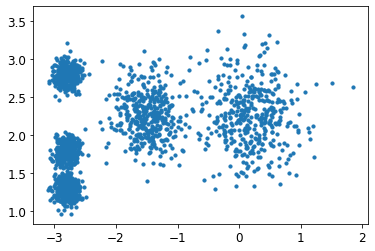

In [47]:
plt.scatter(X[:, 0], X[:, 1], s=10);

## Train k-means to train on this dataset

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## Given X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]), predict labels of new instances

In [49]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])

In [51]:
y_new_Kmean = kmeans.predict(X_new)

In [52]:
y_new_Kmean

array([2, 2, 3, 3])

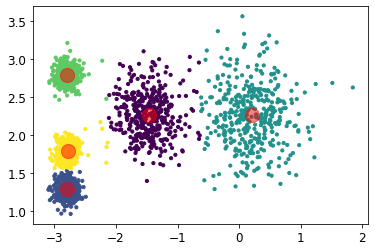

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

## Print the value of the centroid

In [54]:
centers

array([[-1.46924256,  2.27312876],
       [-2.79972331,  1.29106305],
       [ 0.20527099,  2.26255783],
       [-2.78874822,  2.79362203],
       [-2.78298281,  1.80067996]])

## Plot model’s decision boundaries using data, centroids,decision boundaries. Result should be a voronoi_plot

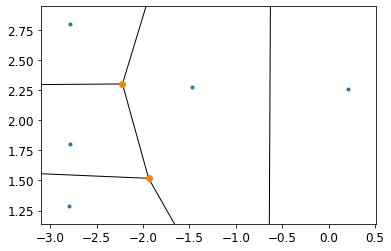

In [55]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(centers)
import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)
plt.show()

## Set values of k = 3 and k = 8, explain your results in both cases by means of the resultant intertia

In [58]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.inertia_)

651.3997089544977


In [59]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
print(kmeans.inertia_)

125.34960690871421


In [ ]:
# Inertia measures how well a dataset was clustered by K-Means.  A good model is one with low inertia AND a low number of clusters ( K ).
# When we utilized a cluster of three, the inertia was 651; however, when we used a cluster of eight, the inertia dropped dramatically to 125.
# 

## plot the inertia as a function of k and analyze the resulting curve, show plots,

In [62]:
inertia_Val = []
for i in range(3, 9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    print(kmeans.inertia_)
    inertia_Val.append(kmeans.inertia_)

651.3997089544976
269.9339858587969
217.62251288601303
175.09069815373556
147.07815229225636
125.38511383241688


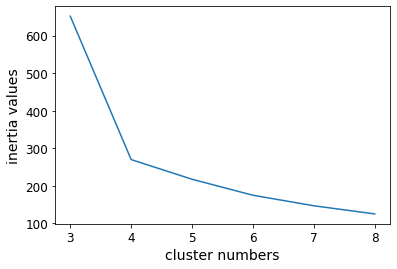

In [69]:
plt.plot(range(3, 9), inertia_Val)
plt.xlabel('cluster numbers')
plt.ylabel('inertia values')
plt.show()

## what is the value of k at elbow

In [66]:
# value of k at elbow is 4